In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AlexTheAnalyst/PandasYouTubeSeries/main/world_population.csv')
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00


In [5]:
df[df['Rank'] <= 10]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
16,8,BGD,Bangladesh,Dhaka,Asia,1.711864e+08,1.674210e+08,1.578300e+08,1.483911e+08,1.291933e+08,1.071477e+08,83929765.0,67541860.0,147570.0,1160.0350,1.0108,2.15
27,7,BRA,Brazil,Brasilia,South America,2.153135e+08,2.131963e+08,2.051882e+08,1.963535e+08,1.758737e+08,1.507064e+08,122288383.0,96369875.0,8515767.0,25.2841,1.0046,2.70
41,1,CHN,China,Beijing,Asia,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,982372466.0,822534450.0,9706961.0,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1.417173e+09,1.396387e+09,1.322867e+09,1.240614e+09,1.059634e+09,NaN,NaN,557501301.0,3287590.0,431.0675,1.0068,17.77
93,4,IDN,Indonesia,Jakarta,Asia,2.755013e+08,2.718580e+08,2.590920e+08,2.440162e+08,2.140724e+08,1.821599e+08,148177096.0,115228394.0,1904569.0,144.6529,1.0064,3.45
131,10,MEX,Mexico,Mexico City,North America,1.275041e+08,1.259983e+08,1.201499e+08,1.125324e+08,9.787344e+07,8.172043e+07,67705186.0,50289306.0,1964375.0,64.9082,1.0063,1.60
149,6,NGA,Nigeria,Abuja,Africa,2.185412e+08,2.083274e+08,1.839958e+08,1.609529e+08,1.228520e+08,9.521426e+07,72951439.0,55569264.0,923768.0,236.5759,1.0241,2.74
156,5,PAK,Pakistan,Islamabad,Asia,2.358249e+08,2.271967e+08,2.109693e+08,1.944545e+08,1.543699e+08,1.154141e+08,80624057.0,59290872.0,881912.0,267.4018,1.0191,2.96
171,9,RUS,Russia,Moscow,Europe,1.447133e+08,1.456173e+08,1.446684e+08,1.432426e+08,1.468448e+08,1.480057e+08,138257420.0,130093010.0,17098242.0,8.4636,0.9973,1.81
221,3,USA,United States,"Washington, D.C.",North America,3.382899e+08,3.359420e+08,3.246078e+08,3.111828e+08,2.823986e+08,2.480837e+08,223140018.0,200328340.0,9372610.0,36.0935,1.0038,4.24


In [6]:
# Finding rows for specific countries using .isin (similar to SQL)
specific_countries = ["Bangladesh", "Brazil"]

df[df['Country'].isin(specific_countries)]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
16,8,BGD,Bangladesh,Dhaka,Asia,171186372.0,167420951.0,157830000.0,148391139.0,129193327.0,107147651.0,83929765.0,67541860.0,147570.0,1160.0350,1.0108,2.15
27,7,BRA,Brazil,Brasilia,South America,215313498.0,213196304.0,205188205.0,196353492.0,175873720.0,150706446.0,122288383.0,96369875.0,8515767.0,25.2841,1.0046,2.70


In [7]:
# Filtering columns to see all that contains the string 'United'
df[df['Country'].str.contains('United')]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
219,97,ARE,United Arab Emirates,Abu Dhabi,Asia,9441129.0,9287289.0,8916899.0,8481771.0,3275333.0,1900151.0,1014048.0,298084.0,83600.0,112.9322,1.0081,0.12
220,21,GBR,United Kingdom,London,Europe,67508936.0,67059474.0,65224364.0,62760039.0,58850043.0,57210442.0,56326328.0,55650166.0,242900.0,277.9289,1.0034,0.85
221,3,USA,United States,"Washington, D.C.",North America,338289857.0,335942003.0,324607776.0,311182845.0,282398554.0,248083732.0,223140018.0,200328340.0,9372610.0,36.0935,1.0038,4.24
222,200,VIR,United States Virgin Islands,Charlotte Amalie,North America,99465.0,100442.0,102803.0,106142.0,108185.0,100685.0,96640.0,63446.0,347.0,286.6427,0.9937,0.00


In [8]:
# Set the Country column as the index
df2 = df.set_index('Country')
df2

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,,,,
Afghanistan,36,AFG,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
Albania,138,ALB,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
Algeria,34,DZA,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
American Samoa,213,ASM,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
Andorra,203,AND,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,226,WLF,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
Western Sahara,172,ESH,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
Yemen,46,YEM,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42


In [9]:
# filter for specific columns
df2.filter(items = ['Continent', 'CCA3'])

,Continent,CCA3
Country,,
Afghanistan,Asia,AFG
Albania,Europe,ALB
Algeria,Africa,DZA
American Samoa,Oceania,ASM
Andorra,Europe,AND
...,...,...
Wallis and Futuna,Oceania,WLF
Western Sahara,Africa,ESH
Yemen,Asia,YEM


In [10]:
df[df['Rank'] < 10].sort_values(by='Rank', ascending=False)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
171,9,RUS,Russia,Moscow,Europe,1.447133e+08,1.456173e+08,1.446684e+08,1.432426e+08,1.468448e+08,1.480057e+08,138257420.0,130093010.0,17098242.0,8.4636,0.9973,1.81
16,8,BGD,Bangladesh,Dhaka,Asia,1.711864e+08,1.674210e+08,1.578300e+08,1.483911e+08,1.291933e+08,1.071477e+08,83929765.0,67541860.0,147570.0,1160.0350,1.0108,2.15
27,7,BRA,Brazil,Brasilia,South America,2.153135e+08,2.131963e+08,2.051882e+08,1.963535e+08,1.758737e+08,1.507064e+08,122288383.0,96369875.0,8515767.0,25.2841,1.0046,2.70
149,6,NGA,Nigeria,Abuja,Africa,2.185412e+08,2.083274e+08,1.839958e+08,1.609529e+08,1.228520e+08,9.521426e+07,72951439.0,55569264.0,923768.0,236.5759,1.0241,2.74
156,5,PAK,Pakistan,Islamabad,Asia,2.358249e+08,2.271967e+08,2.109693e+08,1.944545e+08,1.543699e+08,1.154141e+08,80624057.0,59290872.0,881912.0,267.4018,1.0191,2.96
93,4,IDN,Indonesia,Jakarta,Asia,2.755013e+08,2.718580e+08,2.590920e+08,2.440162e+08,2.140724e+08,1.821599e+08,148177096.0,115228394.0,1904569.0,144.6529,1.0064,3.45
221,3,USA,United States,"Washington, D.C.",North America,3.382899e+08,3.359420e+08,3.246078e+08,3.111828e+08,2.823986e+08,2.480837e+08,223140018.0,200328340.0,9372610.0,36.0935,1.0038,4.24
92,2,IND,India,New Delhi,Asia,1.417173e+09,1.396387e+09,1.322867e+09,1.240614e+09,1.059634e+09,NaN,NaN,557501301.0,3287590.0,431.0675,1.0068,17.77
41,1,CHN,China,Beijing,Asia,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,982372466.0,822534450.0,9706961.0,146.8933,1.0000,17.88


In [11]:
df.reset_index()

,index,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


In [12]:
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


In [13]:
# Set index based on two columns
df.set_index(['Continent','Country'], inplace=True)

In [14]:
# set output to show all rows
pd.set_option('display.max.rows', 235)

In [15]:
# Sort
df.sort_index()

Rank CCA3  \
Continent     Country                                       
Africa        Algeria                             34  DZA   
              Angola                              42  AGO   
              Benin                               77  BEN   
              Botswana                           144  BWA   
              Burkina Faso                        58  BFA   
              Burundi                             78  BDI   
              Cameroon                            53  CMR   
              Cape Verde                         171  CPV   
              Central African Republic           117  CAF   
              Chad                                69  TCD   
              Comoros                            163  COM   
              DR Congo                            15  COD   
              Djibouti                           160  DJI   
              Egypt                               14  EGY   
              Equatorial Guinea                  152  GNQ   
              Eritrea                            132  ERI   
              Eswatini                           159  SWZ   
              Ethiopia                            12  ETH   
              Gabon                              146  GAB   
              Gambia                             142  GMB   
              Ghana                               47  GHA   
              Guinea                              75  GIN   
              Guinea-Bissau                      149  GNB   
              Ivory Coast                         52  CIV   
              Kenya                               27  KEN   
              Lesotho                            147  LSO   
              Liberia                            121  LBR   
              Libya                              107  LBY   
              Madagascar                          50  MDG   
              Malawi                              62  MWI   
              Mali                                59  MLI   
              Mauritania                         126  MRT   
              Mauritius                          157  MUS   
              Mayotte                            182  MYT   
              Morocco                             40  MAR   
              Mozambique                          48  MOZ   
              Namibia                            145  NAM   
              Niger                               54  NER   
              Nigeria                              6  NGA   
              Republic of the Congo              114  COG   
              Reunion                            161  REU   
              Rwanda                              76  RWA   
              Sao Tome and Principe              187  STP   
              Senegal                             72  SEN   
              Seychelles                         196  SYC   
              Sierra Leone                       102  SLE   
              Somalia                             70  SOM   
              South Africa                        24  ZAF   
              South Sudan                         86  SSD   
              Sudan                               32  SDN   
              Tanzania                            22  TZA   
              Togo                               100  TGO   
              Tunisia                             79  TUN   
              Uganda                              31  UGA   
              Western Sahara                     172  ESH   
              Zambia                              63  ZMB   
              Zimbabwe                            74  ZWE   
Asia          Afghanistan                         36  AFG   
              Armenia                            140  ARM   
              Azerbaijan                          91  AZE   
              Bahrain                            154  BHR   
              Bangladesh                           8  BGD   
              Bhutan                             165  BTN   
              Brunei                             175  BRN   
              Cambodia

In [16]:
df

Rank CCA3  \
Continent     Country                                       
Asia          Afghanistan                         36  AFG   
Europe        Albania                            138  ALB   
Africa        Algeria                             34  DZA   
Oceania       American Samoa                     213  ASM   
Europe        Andorra                            203  AND   
Africa        Angola                              42  AGO   
North America Anguilla                           224  AIA   
              Antigua and Barbuda                201  ATG   
South America Argentina                           33  ARG   
Asia          Armenia                            140  ARM   
North America Aruba                              198  ABW   
Oceania       Australia                           55  AUS   
Europe        Austria                             99  AUT   
Asia          Azerbaijan                          91  AZE   
North America Bahamas                            176  BHS   
Asia          Bahrain                            154  BHR   
              Bangladesh                           8  BGD   
North America Barbados                           186  BRB   
Europe        Belarus                             96  BLR   
              Belgium                             81  BEL   
North America Belize                             177  BLZ   
Africa        Benin                               77  BEN   
North America Bermuda                            206  BMU   
Asia          Bhutan                             165  BTN   
South America Bolivia                             80  BOL   
Europe        Bosnia and Herzegovina             137  BIH   
Africa        Botswana                           144  BWA   
South America Brazil                               7  BRA   
North America British Virgin Islands             221  VGB   
Asia          Brunei                             175  BRN   
Europe        Bulgaria                           108  BGR   
Africa        Burkina Faso                        58  BFA   
              Burundi                             78  BDI   
Asia          Cambodia                            73  KHM   
Africa        Cameroon                            53  CMR   
North America Canada                              39  CAN   
Africa        Cape Verde                         171  CPV   
North America Cayman Islands                     205  CYM   
Africa        Central African Republic           117  CAF   
              Chad                                69  TCD   
South America Chile                               65  CHL   
Asia          China                                1  CHN   
South America Colombia                            28  COL   
Africa        Comoros                            163  COM   
Oceania       Cook Islands                       223  COK   
North America Costa Rica                         124  CRI   
Europe        Croatia                            130  HRV   
North America Cuba                                85  CUB   
              Curacao                            189  CUW   
Europe        Cyprus                             158  CYP   
              Czech Republic                      88  CZE   
              Denmark                            115  DNK   
Africa        Djibouti                           160  DJI   
North America Dominica                           204  DMA   
              Dominican Republic                  84  DOM   
Africa        DR Congo                            15  COD   
South America Ecuador                             67  ECU   
Africa        Egypt                               14  EGY   
North America El Salvador                        112  SLV   
Africa        Equatorial Guinea                  152  GNQ   
              Eritrea                            132  ERI   
Europe        Estonia                            156  EST   
Africa        Eswatini                           159  SWZ   
              Ethiopia                            12  ETH   
South America Falkland

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/AlexTheAnalyst/PandasYouTubeSeries/main/Flavors.csv')

In [18]:
df

,Flavor,Base Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
0,Mint Chocolate Chip,Vanilla,Yes,10.0,8.0,18.0
1,Chocolate,Chocolate,Yes,8.8,7.6,16.6
2,Vanilla,Vanilla,No,4.7,5.0,9.7
3,Cookie Dough,Vanilla,Yes,6.9,6.5,13.4
4,Rocky Road,Chocolate,Yes,8.2,7.0,15.2
5,Pistachio,Vanilla,No,2.3,3.4,5.7
6,Cake Batter,Vanilla,Yes,6.5,6.0,12.5
7,Neapolitan,Vanilla,No,3.8,5.0,8.8
8,Chocolte Fudge Brownie,Chocolate,Yes,8.2,7.1,15.3


In [19]:
group_by_frame = df.groupby('Base Flavor')

In [20]:
group_by_frame.mean()

/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_8483/4024548864.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_by_frame.mean()


,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,
Chocolate,8.4,7.233333,15.70
Vanilla,5.7,5.650000,11.35


In [21]:
# combine previous code into one line
df.groupby('Base Flavor').mean()

/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_8483/1862179576.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Base Flavor').mean()


,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,
Chocolate,8.4,7.233333,15.70
Vanilla,5.7,5.650000,11.35


In [22]:
df.groupby('Base Flavor').count()

,Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,,,
Chocolate,3,3,3,3,3
Vanilla,6,6,6,6,6


In [23]:
df.groupby('Base Flavor').min()

,Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,,,
Chocolate,Chocolate,Yes,8.2,7.0,15.2
Vanilla,Cake Batter,No,2.3,3.4,5.7


In [24]:
# Perform multiple aggregate functions on a single column. Use curly braces to specify the column, follow with ":" and square 
# brackets to create the list of aggregate functions you want to perform
df.groupby('Base Flavor').agg({'Flavor Rating': ['mean', 'max', 'count', 'sum']})

Flavor Rating                  
                     mean   max count   sum
Base Flavor                                
Chocolate             8.4   8.8     3  25.2
Vanilla               5.7  10.0     6  34.2

In [25]:
# Aggregate functions on multiple columns. Same as above, but add comma after the first list (after the square bracket). 
df.groupby('Base Flavor').agg({'Flavor Rating': ['mean', 'max', 'count', 'sum'], 'Texture Rating': ['mean', 'max', 'count', 'sum']})

Flavor Rating                   Texture Rating                 
                     mean   max count   sum           mean  max count   sum
Base Flavor                                                                
Chocolate             8.4   8.8     3  25.2       7.233333  7.6     3  21.7
Vanilla               5.7  10.0     6  34.2       5.650000  8.0     6  33.9

In [26]:
# Group on multiple columns
df.groupby(['Base Flavor', 'Liked']).mean()

/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_8483/39172851.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Base Flavor', 'Liked']).mean()


Flavor Rating  Texture Rating  Total Rating
Base Flavor Liked                                             
Chocolate   Yes              8.4        7.233333     15.700000
Vanilla     No               3.6        4.466667      8.066667
            Yes              7.8        6.833333     14.633333

In [27]:
# To get a quick summary of stats use ".describe()"
df.groupby('Base Flavor').describe()

Flavor Rating                                             \
                    count mean       std  min    25%  50%  75%   max   
Base Flavor                                                            
Chocolate             3.0  8.4  0.346410  8.2  8.200  8.2  8.5   8.8   
Vanilla               6.0  5.7  2.710719  2.3  4.025  5.6  6.8  10.0   

            Texture Rating            ...             Total Rating         \
                     count      mean  ...    75%  max        count   mean   
Base Flavor                           ...                                   
Chocolate              3.0  7.233333  ...  7.350  7.6          3.0  15.70   
Vanilla                6.0  5.650000  ...  6.375  8.0          6.0  11.35   

                                                         
                  std   min     25%   50%     75%   max  
Base Flavor                                              
Chocolate    0.781025  15.2  15.250  15.3  15.950  16.6  
Vanilla      4.263684   5.7   9.025  11.1  13.175  18.0  

[2 rows x 24 columns]

Merge, Join, and Concatenate Data Frames

In [28]:
df1 = pd.read_csv('https://raw.githubusercontent.com/AlexTheAnalyst/PandasYouTubeSeries/main/LOTR.csv')
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [29]:
df2 = pd.read_csv('https://raw.githubusercontent.com/AlexTheAnalyst/PandasYouTubeSeries/main/LOTR%202.csv')
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


In [30]:
df1.merge(df2, how = 'inner', on = 'FellowshipID')

,FellowshipID,FirstName_x,Skills,FirstName_y,Age
0,1001,Frodo,Hiding,Frodo,50
1,1002,Samwise,Gardening,Samwise,39


In [31]:
df1.merge(df2, how = 'outer', on = ['FellowshipID', 'FirstName'])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


In [32]:
df1.merge(df2, how = 'left')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


In [33]:
df1.merge(df2, how = 'right')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


In [34]:
df1.merge(df2, how = 'cross')

,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


In [35]:
# Using '.join' instead of '.merge' works better with indexes
df1.join(df2, on = 'FellowshipID', how = 'outer', lsuffix = '_Left', rsuffix = '_Right')

,FellowshipID,FellowshipID_Left,FirstName_Left,Skills,FellowshipID_Right,FirstName_Right,Age
0.0,1001,1001.0,Frodo,Hiding,NaN,NaN,NaN
1.0,1002,1002.0,Samwise,Gardening,NaN,NaN,NaN
2.0,1003,1003.0,Gandalf,Spells,NaN,NaN,NaN
3.0,1004,1004.0,Pippin,Fireworks,NaN,NaN,NaN
NaN,0,NaN,NaN,NaN,1001.0,Frodo,50.0
NaN,1,NaN,NaN,NaN,1002.0,Samwise,39.0
NaN,2,NaN,NaN,NaN,1006.0,Legolas,2931.0
NaN,3,NaN,NaN,NaN,1007.0,Elrond,6520.0
NaN,4,NaN,NaN,NaN,1008.0,Barromir,51.0


In [36]:
# .join using index. Set the index when specifying which column you want to join on.
df4 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix = '_Left', rsuffix = '_Right', how='outer')
df4

,FirstName_Left,Skills,FirstName_Right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN
1006,NaN,NaN,Legolas,2931.0
1007,NaN,NaN,Elrond,6520.0
1008,NaN,NaN,Barromir,51.0


Concatenate

In [37]:
# puts both tables on top of each other. 
pd.concat([df1,df2])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [38]:
pd.concat([df1,df2], join='inner')

,FellowshipID,FirstName
0,1001,Frodo
1,1002,Samwise
2,1003,Gandalf
3,1004,Pippin
0,1001,Frodo
1,1002,Samwise
2,1006,Legolas
3,1007,Elrond
4,1008,Barromir


In [39]:
pd.concat([df1,df2], join='inner', axis= 1)

,FellowshipID,FirstName,Skills,FellowshipID,FirstName,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1002,Samwise,Gardening,1002,Samwise,39
2,1003,Gandalf,Spells,1006,Legolas,2931
3,1004,Pippin,Fireworks,1007,Elrond,6520


In [40]:
df1.append(df2)

/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_8483/3062608662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/AlexTheAnalyst/PandasYouTubeSeries/main/Ice%20Cream%20Ratings.csv')
df = df.set_index('Date')
df

,Flavor Rating,Texture Rating,Overall Rating
Date,,,
1/1/2022,0.223090,0.040220,0.600129
1/2/2022,0.635886,0.938476,0.106264
1/3/2022,0.442323,0.044154,0.598112
1/4/2022,0.389128,0.549676,0.489353
1/5/2022,0.386887,0.519439,0.988280
1/6/2022,0.877984,0.193588,0.832827
1/7/2022,0.140995,0.325110,0.105147


<Axes: title={'center': 'Ice Cream Ratings'}, xlabel='Daily Rating', ylabel='Scores'>

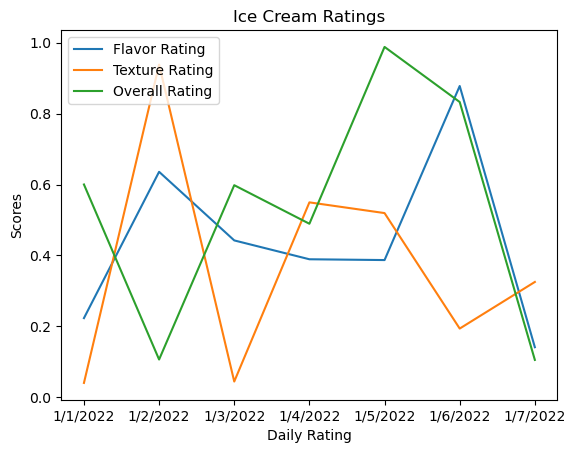

In [42]:
df.plot(kind='line', title='Ice Cream Ratings', xlabel='Daily Rating', ylabel='Scores')

<Axes: xlabel='Date'>

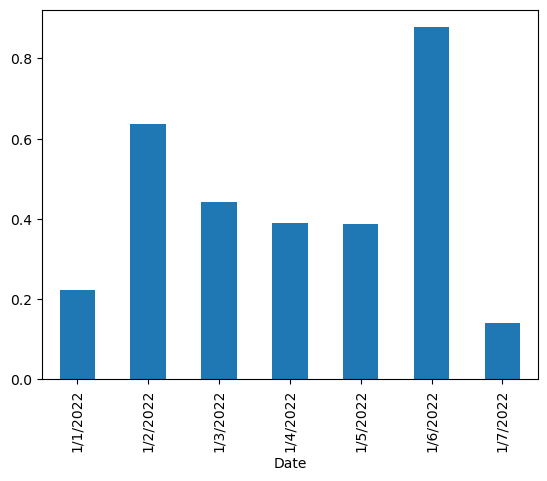

In [43]:
df['Flavor Rating'].plot(kind='bar', stacked = True)

<Axes: ylabel='Date'>

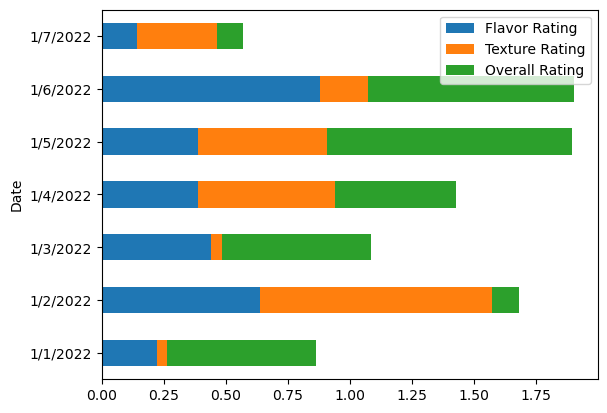

In [44]:
df.plot.barh(stacked = True)

<Axes: xlabel='Overall Rating', ylabel='Texture Rating'>

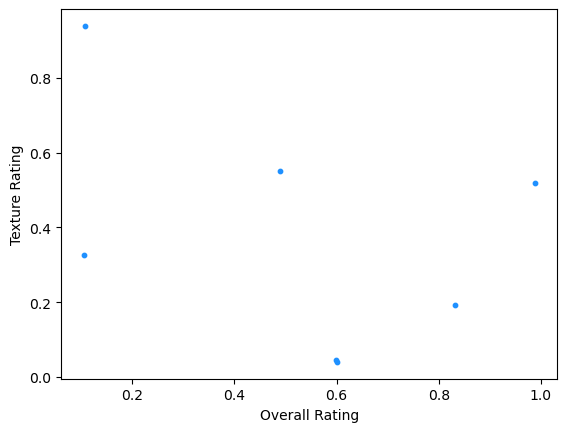

In [45]:
df.plot.scatter(x = 'Overall Rating', y = 'Texture Rating', s = 10, c = 'dodgerblue')

<Axes: ylabel='Frequency'>

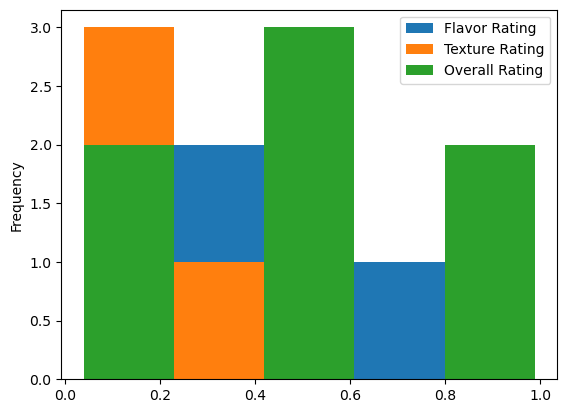

In [46]:
df.plot.hist(bins = 5)

<Axes: ylabel='Flavor Rating'>

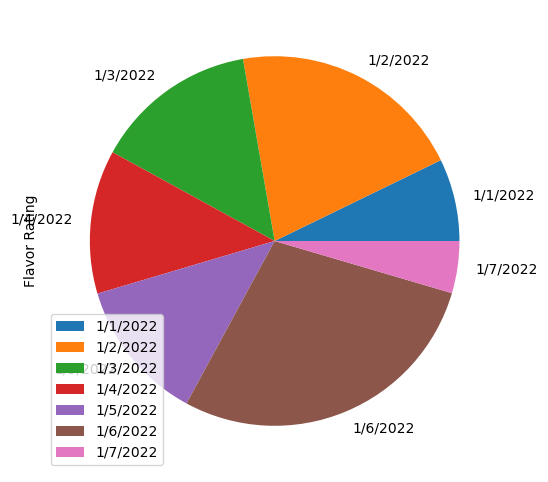

In [55]:
df.plot.pie(y='Flavor Rating', figsize = (10,6))

In [56]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [59]:
df[["Flavor Rating", "Texture Rating"]]

,Flavor Rating,Texture Rating
Date,,
1/1/2022,0.223090,0.040220
1/2/2022,0.635886,0.938476
1/3/2022,0.442323,0.044154
1/4/2022,0.389128,0.549676
1/5/2022,0.386887,0.519439
1/6/2022,0.877984,0.193588
1/7/2022,0.140995,0.325110


In [60]:
df.describe()

,Flavor Rating,Texture Rating,Overall Rating
count,7.000000,7.000000,7.000000
mean,0.442328,0.372952,0.531445
std,0.249008,0.322952,0.334906
min,0.140995,0.040220,0.105147
25%,0.304989,0.118871,0.297808
50%,0.389128,0.325110,0.598112
75%,0.539104,0.534557,0.716478
max,0.877984,0.938476,0.988280
